# kNN1 Wilcoxon Plots###

## Load Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import seaborn as sns
from scipy import stats
import math as mth
import pandas as pd

In [3]:
ks = np.logspace(0,4,10,endpoint=True)
weights = ['uniform','distance']
metrics = ['r2','mae','rmse','cvrmse','spearmanr']

## Loop through data files and plot

/Users/JakeCanfield/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/JakeCanfield/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se


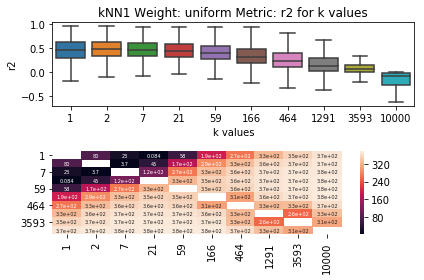

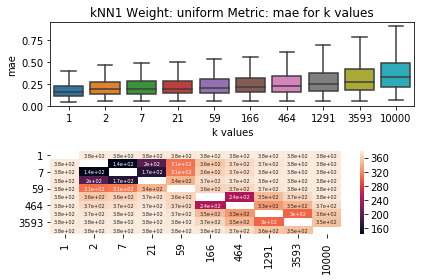

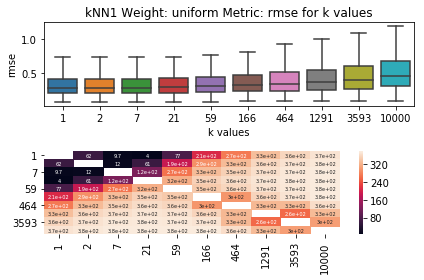

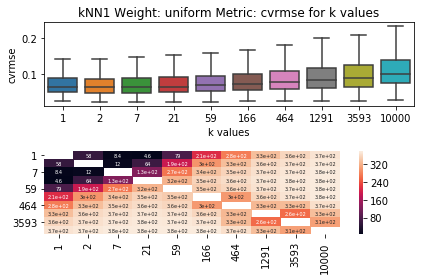

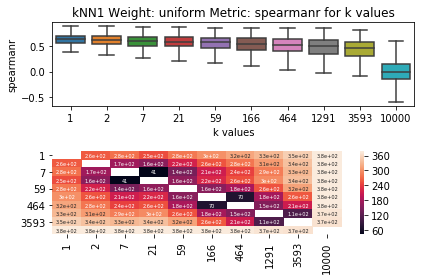

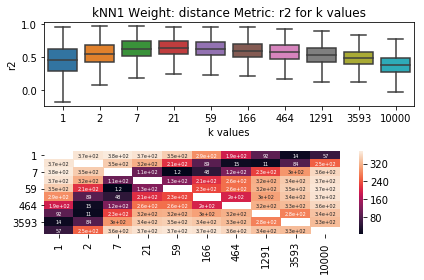

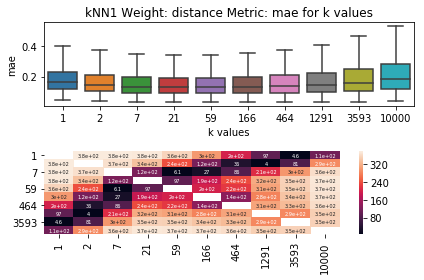

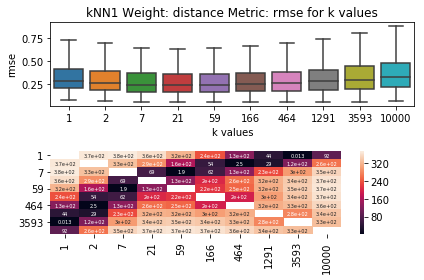

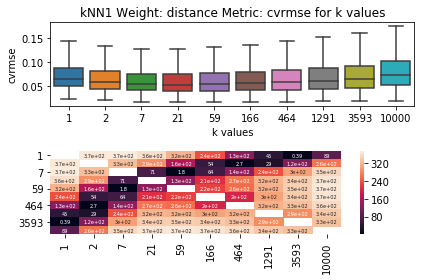

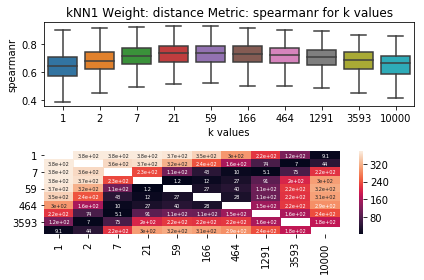

In [5]:
for weight in weights:
    
    for metric in metrics:
        
        values_for_k = []
        
        for k in ks.astype(int):
            
            array = np.load('/Users/JakeCanfield/Desktop/Krishnan Research Group/data/20180225/%s_norm/%s_for_all_genes_k=%i.npy'%(weight,metric,k))
            values_for_k.append(array)
            
        ps_for_k = []
          
        for y in values_for_k:


            ps = []

            for x in values_for_k:
    
    
                wilcoxon_T, wilcoxon_p = stats.wilcoxon(y,x,zero_method='wilcox')


                ps.append(wilcoxon_p)
                
                
    
            ps_for_k.append(ps)
            

        ps_for_k = -np.log(np.array(ps_for_k))
        values_for_k = np.array(values_for_k).T
        values_for_k = pd.DataFrame(values_for_k,columns= ks.astype(int))
        plt.subplot(2, 1, 1)
        sns.boxplot(data=values_for_k,showfliers=False)
        plt.xlabel('k values')
        plt.ylabel('%s'%metric)
        plt.title('kNN1 Weight: %s Metric: %s for k values'%(weight,metric))
        df = pd.DataFrame(ps_for_k,columns= ks.astype(int),index=ks.astype(int))
        
        plt.subplot(2, 1, 2)
        sns.heatmap(df, annot=True, annot_kws={"size": 5})
        plt.tight_layout()
        plt.yticks(rotation=0)
        plt.show()